In [63]:
import pandas as pd

df = pd.read_csv('trans/final_merged_data.csv')

In [64]:
# 월별 데이터로 변환
df['시점'] = pd.to_datetime(df['시점'], errors='coerce')
df = df.dropna(subset=['시점'])
df['시점'] = pd.to_datetime(df['시점'].astype(str) + '-01-01')

# 인덱스로 설정
yearly_data = df.set_index('시점')

# 지역별로 그룹화 후 리샘플링
monthly_dfs = []

for region, group in yearly_data.groupby('지역'):
    monthly_df['합계출산율(명)'] = monthly_df['합계출산율(명)'].round(3)
    monthly_df['아파트매매가격지수(%)'] = monthly_df['아파트매매가격지수(%)'].round(3)
    monthly_df['인구밀도(명/km2)'] = monthly_df['인구밀도(명/km2)'].round(2)
    monthly_df['사교육참여율(%)'] = monthly_df['사교육참여율(%)'].round(1)
    monthly_df['고용률(%)'] = monthly_df['고용률(%)'].round(1)
    monthly_df['여성초혼연령(년)'] = monthly_df['여성초혼연령(년)'].round(2)
    monthly_df['인터넷이용률(%)'] = monthly_df['인터넷이용률(%)'].round(1)
    monthly_df['근로시간(시간)'] = monthly_df['근로시간(시간)'].round(2)
    
    # 보간
    monthly_df = monthly_df.infer_objects(copy=False).interpolate(method='linear')
    
    # NaN 값 처리
    monthly_df.fillna(0, inplace=True)
    
    # 시점 다시 설정
    monthly_df.reset_index(drop=True, inplace=True)
    
    # '시점'이 datetime인지 확인 후, 형식 변경
    if pd.api.types.is_datetime64_any_dtype(monthly_df['시점']):
        monthly_df['시점'] = monthly_df['시점'].dt.strftime('%Y.%m')
    
    # 지역별 컬럼 추가
    monthly_df['지역'] = region
    
    monthly_dfs.append(monthly_df)

final_monthly_df = pd.concat(monthly_dfs, ignore_index=True)

final_monthly_df.head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_6084\3492856176.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['시점'] = pd.to_datetime(df['시점'].astype(str) + '-01-01')
C:\Users\Admin\AppData\Local\Temp\ipykernel_6084\3492856176.py:23: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  monthly_df = monthly_df.infer_objects(copy=False).interpolate(method='linear')
C:\Users\Admin\AppData\Local\Temp\ipykernel_6084\3492856176.py:23: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  monthly_df = monthly_df.infer_objects(copy=False).interpolate(method='linear')
C:\Users\Admin\AppData\Local\Temp\ipykernel_6084\3492

,level_0,index,시점,합계출산율(명),아파트매매가격지수(%),인구밀도(명/km2),사교육참여율(%),고용률(%),여성초혼연령(년),인터넷이용률(%),근로시간(시간),지역
0,0,0,2011.01,1.428,87.767,205.64,64.9,38.6,28.66,72.1,2046.0,강원
1,1,1,2011.02,1.433,88.582,205.83,64.8,38.4,28.67,72.1,2040.7,강원
2,2,2,2011.03,1.438,89.398,206.01,64.7,38.2,28.69,72.2,2035.4,강원
3,3,3,2011.04,1.442,90.213,206.20,64.6,38.0,28.70,72.2,2030.1,강원
4,4,4,2011.05,1.447,91.028,206.39,64.6,37.9,28.72,72.3,2024.8,강원


In [65]:
# 과적합 방지 및 정보 누출 방지, 모델의 단순화를 위해 시점 제거
new_df = final_monthly_df.drop(columns=['시점', 'level_0', 'index'])

new_df['지역'].unique(), new_df['지역'].nunique(), new_df.head()

(array(['강원', '경기', '경남', '경북', '광주', '대구', '대전', '부산', '서울', '세종', '울산',
        '인천', '전남', '전북', '제주', '충남', '충북'], dtype=object),
 17,
    합계출산율(명)  아파트매매가격지수(%)  인구밀도(명/km2)  사교육참여율(%)  고용률(%)  여성초혼연령(년)  \
 0     1.428        87.767       205.64       64.9    38.6      28.66   
 1     1.433        88.582       205.83       64.8    38.4      28.67   
 2     1.438        89.398       206.01       64.7    38.2      28.69   
 3     1.442        90.213       206.20       64.6    38.0      28.70   
 4     1.447        91.028       206.39       64.6    37.9      28.72   
 
    인터넷이용률(%)  근로시간(시간)  지역  
 0       72.1    2046.0  강원  
 1       72.1    2040.7  강원  
 2       72.2    2035.4  강원  
 3       72.2    2030.1  강원  
 4       72.3    2024.8  강원  )

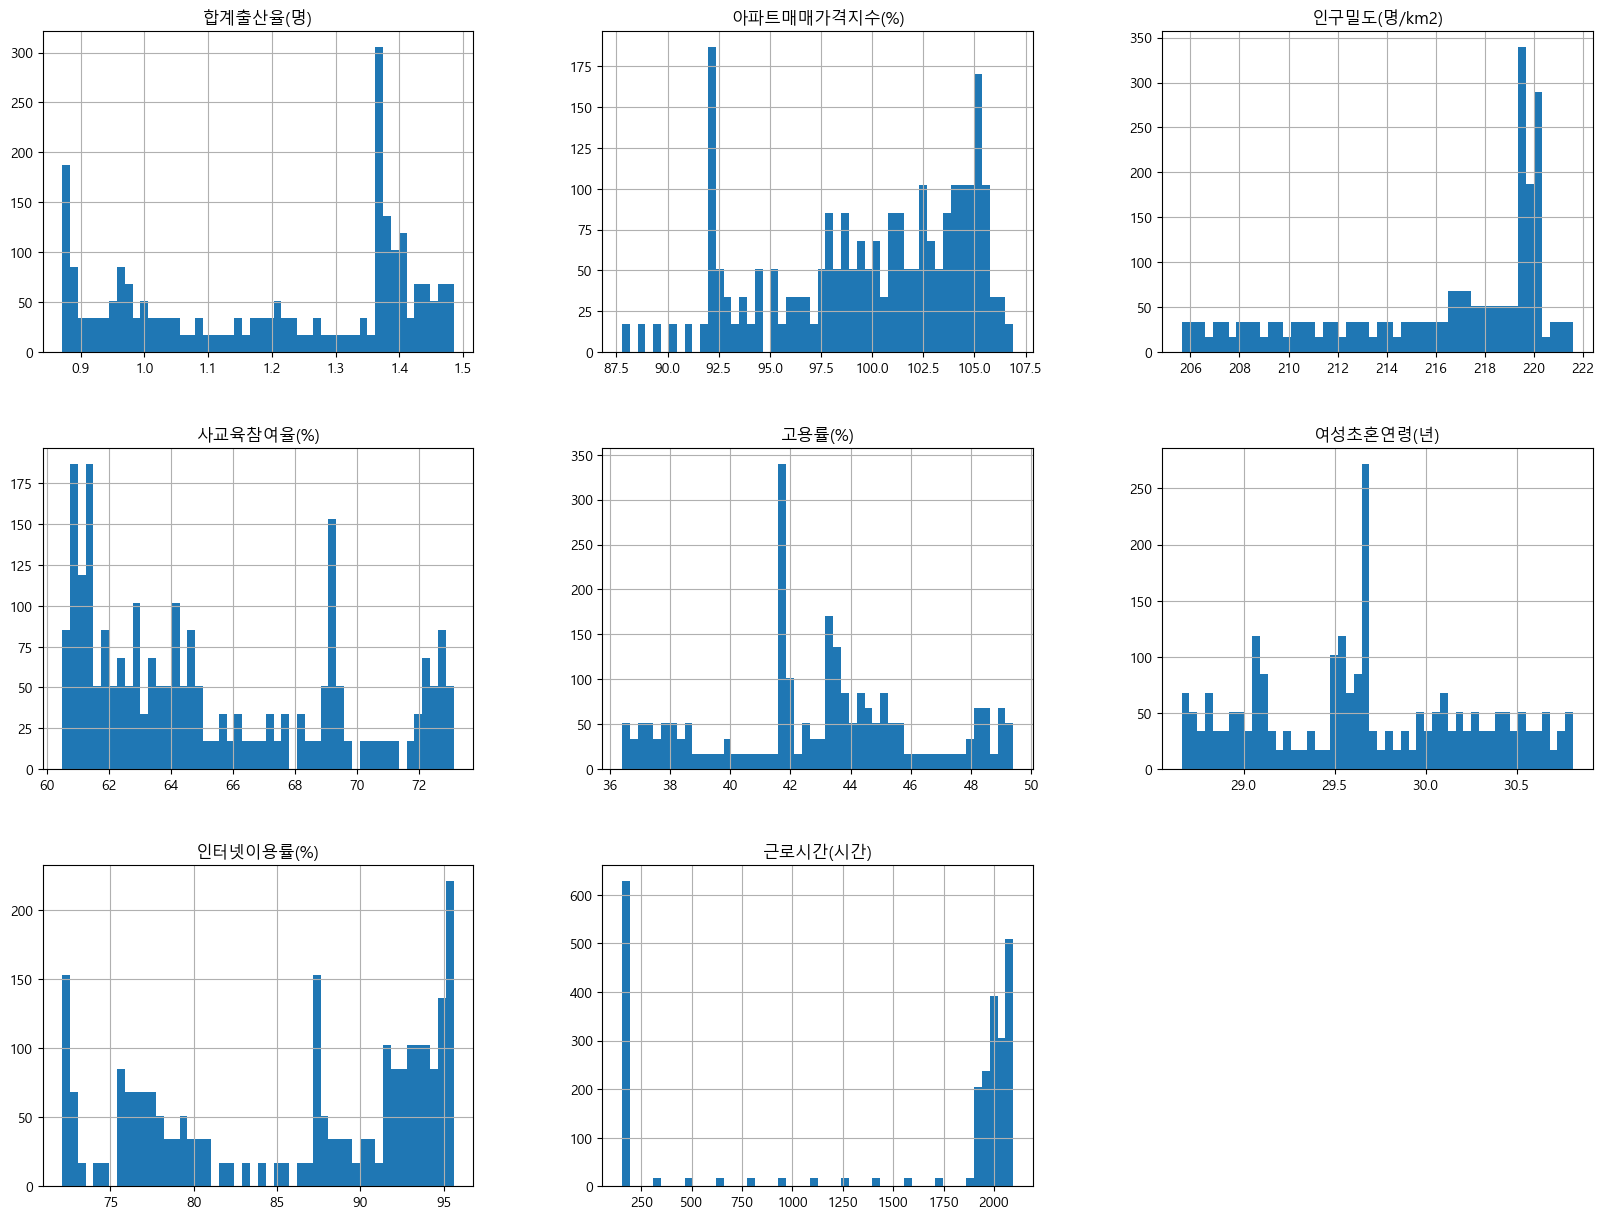

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

new_df.hist(bins = 50, figsize = (20,15))
plt.show()

In [67]:
# 지역 레이블 인코딩
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
regions = new_df['지역'].unique().tolist()
new_df['지역_인코딩'] = label_encoder.fit_transform(new_df['지역'])
new_df = new_df.drop(columns=['지역'])
new_df.head()

,합계출산율(명),아파트매매가격지수(%),인구밀도(명/km2),사교육참여율(%),고용률(%),여성초혼연령(년),인터넷이용률(%),근로시간(시간),지역_인코딩
0,1.428,87.767,205.64,64.9,38.6,28.66,72.1,2046.0,0
1,1.433,88.582,205.83,64.8,38.4,28.67,72.1,2040.7,0
2,1.438,89.398,206.01,64.7,38.2,28.69,72.2,2035.4,0
3,1.442,90.213,206.20,64.6,38.0,28.70,72.2,2030.1,0
4,1.447,91.028,206.39,64.6,37.9,28.72,72.3,2024.8,0


In [68]:
# 상관관계 계산
corr_matrix = new_df.drop(columns=['지역_인코딩']).corr()
corr_matrix

,합계출산율(명),아파트매매가격지수(%),인구밀도(명/km2),사교육참여율(%),고용률(%),여성초혼연령(년),인터넷이용률(%),근로시간(시간)
합계출산율(명),1.000000,0.002558,-0.854460,-0.790817,-0.896361,-0.954057,-0.903056,0.876299
아파트매매가격지수(%),0.002558,1.000000,0.192327,-0.012341,0.354415,0.226321,0.008275,-0.052889
인구밀도(명/km2),-0.854460,0.192327,1.000000,0.546072,0.892254,0.918878,0.955427,-0.618915
사교육참여율(%),-0.790817,-0.012341,0.546072,1.000000,0.747951,0.712037,0.637929,-0.636039
고용률(%),-0.896361,0.354415,0.892254,0.747951,1.000000,0.942234,0.847547,-0.729255
여성초혼연령(년),-0.954057,0.226321,0.918878,0.712037,0.942234,1.000000,0.904104,-0.845969
인터넷이용률(%),-0.903056,0.008275,0.955427,0.637929,0.847547,0.904104,1.000000,-0.657055
근로시간(시간),0.876299,-0.052889,-0.618915,-0.636039,-0.729255,-0.845969,-0.657055,1.000000


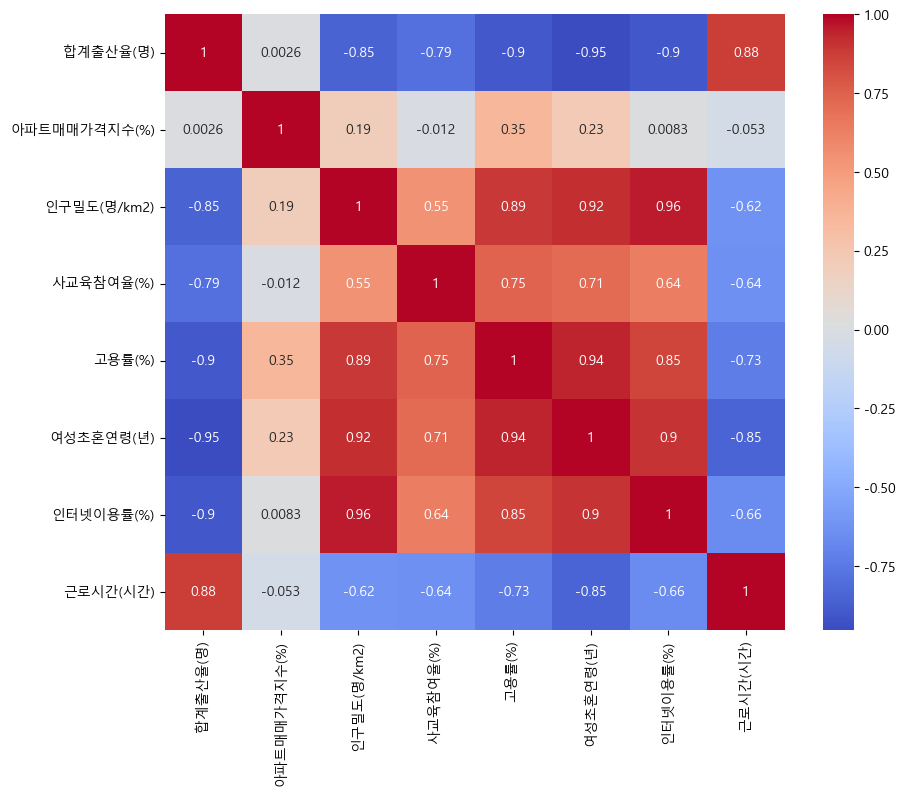

In [69]:
# 히트맵 작성
plt.figure(figsize = (10,8))
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm')
plt.show()

In [70]:
# 왜도 확인
import numpy as np

# new_df.loc[:, '인구밀도(명/km2)'] = np.log1p(new_df['인구밀도(명/km2)'])
new_df.skew()

합계출산율(명)       -0.284641
아파트매매가격지수(%)   -0.547409
인구밀도(명/km2)    -0.777125
사교육참여율(%)       0.592040
고용률(%)         -0.020802
여성초혼연령(년)       0.111491
인터넷이용률(%)      -0.384205
근로시간(시간)       -0.897551
지역_인코딩          0.000000
dtype: float64

In [72]:
# 다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(new_df, target_column):
    independent_vars = new_df.drop(columns=[target_column])
    vif_data = pd.DataFrame()
    vif_data['Variable'] = independent_vars.columns
    vif_data['VIF'] = [variance_inflation_factor(independent_vars.values, i) for i in range(independent_vars.shape[1])]
    return vif_data

target_column = '합계출산율(명)'
vif_result = calculate_vif(new_df.drop('지역_인코딩',  axis = 1), target_column)
vif_result


,Variable,VIF
0,아파트매매가격지수(%),1618.371993
1,인구밀도(명/km2),159148.300441
2,사교육참여율(%),2343.026485
3,고용률(%),3085.799991
4,여성초혼연령(년),153778.121355
5,인터넷이용률(%),1673.209284
6,근로시간(시간),57.844666


In [74]:
vif_df = new_df.drop(columns=['인구밀도(명/km2)', '여성초혼연령(년)'])

def calculate_vif(vif_df, target_column):
    independent_vars = vif_df.drop(columns=[target_column])
    vif_data = pd.DataFrame()
    vif_data['Variable'] = independent_vars.columns
    vif_data['VIF'] = [variance_inflation_factor(independent_vars.values, i) for i in range(independent_vars.shape[1])]
    return vif_data

vif_result2 = calculate_vif(vif_df.drop('지역_인코딩',  axis = 1), target_column)
vif_result2

,Variable,VIF
0,아파트매매가격지수(%),504.478169
1,사교육참여율(%),440.627302
2,고용률(%),1690.569732
3,인터넷이용률(%),514.470893
4,근로시간(시간),9.441744


In [92]:
# 데이터 분리
from sklearn.model_selection import train_test_split

X = new_df.drop(columns=['합계출산율(명)'])
# X = new_df.drop(columns=['합계출산율(명)', '인구밀도(명/km2)', '여성초혼연령(년)', '인터넷이용률(%)', '고용률(%)', '근로시간(시간)', '사교육참여율(%)'])
y = new_df['합계출산율(명)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

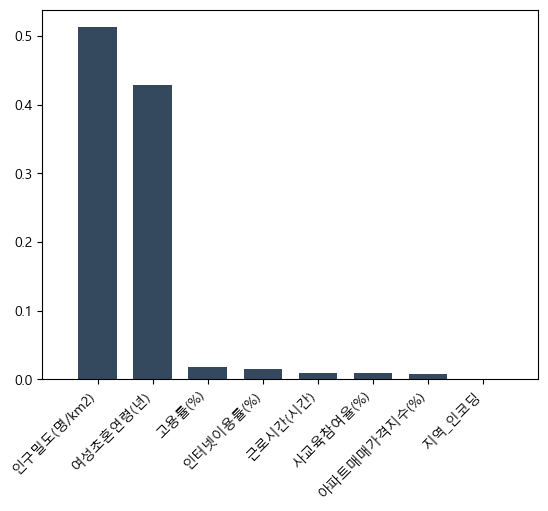

In [93]:
# 변수 중요도 확인
import numpy as np
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

bar_width = 0.7
plt.bar(range(X.shape[1]), importances[indices], width=bar_width, color=(52/255, 73/255, 94/255, 1.0), align='center')
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=45, ha='right')
plt.xlim([-1, X.shape[1]])
plt.show()